In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import shap
import socket
import matplotlib.pyplot as plt
from tqdm import tqdm

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
import seaborn as sns
import os
import gc
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

In [10]:
df = pd.read_csv("../data/raw/CIC_IoMT_2024_WiFi_MQTT_train.csv")

In [11]:
df.sample(5)

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
243585,24775.0,17.0,64.0,18271.18800,18271.18800,0,0.0,0.0,0.0,0.0,...,0.0,50.0,84696660.0,9.5,10.00,0.0,0.0,0.0,141.5,TCP_IP-DDoS-UDP4_train
2464796,54.0,6.0,64.0,87.00406,87.00406,0,0.0,0.0,0.0,0.0,...,0.0,54.0,84696024.0,9.5,10.39,0.0,0.0,0.0,141.5,TCP_IP-DDoS-TCP2_train
5437238,54.0,6.0,64.0,84.84155,84.84155,0,0.0,0.0,0.0,0.0,...,0.0,54.0,84696000.0,9.5,10.39,0.0,0.0,0.0,141.5,TCP_IP-DDoS-TCP1_train
5430736,54.0,6.0,64.0,96.88032,96.88032,0,0.0,0.0,0.0,0.0,...,0.0,54.0,84696000.0,9.5,10.39,0.0,0.0,0.0,141.5,TCP_IP-DDoS-TCP1_train
4930555,54.0,6.0,64.0,43464.29000,43464.29000,0,0.0,1.0,0.0,0.0,...,0.0,54.0,84696250.0,9.5,10.39,0.0,0.0,0.0,141.5,TCP_IP-DDoS-SYN4_train


In [12]:
df.shape

(7160831, 46)

In [13]:
df.describe()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7160831.0,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,...,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06
mean,2.958836e+04,8.042994e+00,6.474652e+01,1.523202e+04,1.523202e+04,0.0,5.079549e-03,1.587609e-01,3.862139e-02,2.240655e-02,...,6.083873e+01,6.405736e+00,6.084030e+01,8.468349e+07,9.499081e+00,1.044928e+01,9.047365e+00,2.535226e+03,9.148464e-02,1.414795e+02
std,2.762618e+05,6.292249e+00,8.405145e+00,3.950968e+04,3.950968e+04,0.0,3.411170e-02,3.388233e-01,1.371016e-01,9.713146e-02,...,8.809639e+01,3.917352e+01,8.787611e+01,1.788442e+07,8.446717e-01,3.169333e+00,5.538150e+01,2.045832e+04,2.327133e-01,2.174133e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,-1.282061e+00,1.000000e+00,9.164000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.400000e+01,1.160000e+00,6.400000e+01,6.685014e+00,6.685014e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.234000e+01,0.000000e+00,4.260000e+01,8.467888e+07,9.500000e+00,9.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
50%,1.080000e+02,6.000000e+00,6.400000e+01,1.452887e+02,1.452887e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.469641e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
75%,1.958050e+04,1.700000e+01,6.400000e+01,1.914681e+04,1.914681e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.469686e+07,9.500000e+00,1.039000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
max,9.895636e+06,1.700000e+01,2.550000e+02,2.097152e+06,2.097152e+06,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.514000e+03,7.210000e+02,1.514000e+03,1.694694e+08,1.500000e+01,5.503000e+01,1.020000e+03,5.204379e+05,1.000000e+00,2.446000e+02


In [14]:
df['label'].unique()

array(['TCP_IP-DDoS-UDP2_train', 'TCP_IP-DDoS-UDP4_train',
       'TCP_IP-DDoS-ICMP6_train', 'TCP_IP-DoS-SYN2_train',
       'TCP_IP-DDoS-ICMP3_train', 'TCP_IP-DDoS-ICMP1_train',
       'TCP_IP-DDoS-UDP8_train', 'TCP_IP-DDoS-UDP1_train',
       'MQTT-DoS-Connect_Flood_train', 'MQTT-DDoS-Publish_Flood_train',
       'TCP_IP-DDoS-ICMP5_train', 'TCP_IP-DDoS-SYN3_train',
       'MQTT-DDoS-Connect_Flood_train', 'TCP_IP-DDoS-UDP3_train',
       'TCP_IP-DDoS-TCP2_train', 'MQTT-DoS-Publish_Flood_train',
       'TCP_IP-DoS-TCP3_train', 'TCP_IP-DoS-UDP3_train',
       'TCP_IP-DoS-ICMP3_train', 'TCP_IP-DDoS-SYN2_train',
       'TCP_IP-DDoS-UDP6_train', 'TCP_IP-DDoS-ICMP2_train',
       'Benign_train', 'TCP_IP-DDoS-ICMP7_train', 'TCP_IP-DoS-SYN1_train',
       'TCP_IP-DoS-SYN4_train', 'TCP_IP-DDoS-TCP4_train',
       'Recon-OS_Scan_train', 'Recon-Ping_Sweep_train',
       'TCP_IP-DDoS-SYN1_train', 'Recon-VulScan_train',
       'TCP_IP-DDoS-ICMP8_train', 'TCP_IP-DoS-TCP1_train',
       'TCP_IP-DoS-

In [15]:
import pandas as pd
label_mapping = {
    'Benign': ['Benign_train'],
    
    'Spoofing': ['ARP_Spoofing_train'],

    'Reconnaissance': [
        'Recon-OS_Scan_train',
        'Recon-Ping_Sweep_train',
        'Recon-VulScan_train',
        'Recon-Port_Scan_train'
    ],
    
    'MQTT': [
        'MQTT-Malformed_Data_train',
        'MQTT-DoS-Connect_Flood_train',
        'MQTT-DDoS-Publish_Flood_train',
        'MQTT-DoS-Publish_Flood_train',
        'MQTT-DDoS-Connect_Flood_train'
    ],

    'DoS': [
        'TCP_IP-DoS-TCP1_train', 'TCP_IP-DoS-TCP2_train', 'TCP_IP-DoS-TCP3_train', 'TCP_IP-DoS-TCP4_train',
        'TCP_IP-DoS-UDP1_train', 'TCP_IP-DoS-UDP2_train', 'TCP_IP-DoS-UDP3_train', 'TCP_IP-DoS-UDP4_train',
        'TCP_IP-DoS-ICMP1_train', 'TCP_IP-DoS-ICMP2_train', 'TCP_IP-DoS-ICMP3_train', 'TCP_IP-DoS-ICMP4_train',
        'TCP_IP-DoS-SYN1_train', 'TCP_IP-DoS-SYN2_train', 'TCP_IP-DoS-SYN3_train', 'TCP_IP-DoS-SYN4_train'
    ],

    'DDoS': [
        'TCP_IP-DDoS-TCP1_train', 'TCP_IP-DDoS-TCP2_train', 'TCP_IP-DDoS-TCP3_train', 'TCP_IP-DDoS-TCP4_train',
        'TCP_IP-DDoS-UDP1_train', 'TCP_IP-DDoS-UDP2_train', 'TCP_IP-DDoS-UDP3_train', 'TCP_IP-DDoS-UDP4_train',
        'TCP_IP-DDoS-UDP5_train', 'TCP_IP-DDoS-UDP6_train', 'TCP_IP-DDoS-UDP7_train', 'TCP_IP-DDoS-UDP8_train',
        'TCP_IP-DDoS-ICMP1_train', 'TCP_IP-DDoS-ICMP2_train', 'TCP_IP-DDoS-ICMP3_train', 'TCP_IP-DDoS-ICMP4_train',
        'TCP_IP-DDoS-ICMP5_train', 'TCP_IP-DDoS-ICMP6_train', 'TCP_IP-DDoS-ICMP7_train', 'TCP_IP-DDoS-ICMP8_train',
        'TCP_IP-DDoS-SYN1_train', 'TCP_IP-DDoS-SYN2_train', 'TCP_IP-DDoS-SYN3_train', 'TCP_IP-DDoS-SYN4_train'
    ]
}

In [16]:
def map_category(label):
    for parent, sub_labels in label_mapping.items():
        if label in sub_labels:
            return parent
    return 'Unknown'
df['SuperClass'] = df['label'].apply(map_category)

In [17]:
grouped = df.groupby(['SuperClass', 'label']).size().reset_index(name='Records')
total = len(df)
grouped['Percentage'] = (grouped['Records'] / total) * 100

summary = grouped.groupby('SuperClass')['Records'].sum().reset_index()
summary['Percentage'] = (summary['Records'] / total) * 100

print("Hierarchical Breakdown:")
display(grouped.sort_values(['SuperClass', 'Records'], ascending=[True, False]).head(20))

print("Category Summary:")
display(summary)

Hierarchical Breakdown:


,SuperClass,label,Records,Percentage
0,Benign,Benign_train,192732,2.691475
18,DDoS,TCP_IP-DDoS-UDP2_train,207295,2.894846
19,DDoS,TCP_IP-DDoS-UDP3_train,206604,2.885196
20,DDoS,TCP_IP-DDoS-UDP4_train,206343,2.881551
17,DDoS,TCP_IP-DDoS-UDP1_train,206170,2.879135
21,DDoS,TCP_IP-DDoS-UDP5_train,205507,2.869876
24,DDoS,TCP_IP-DDoS-UDP8_train,204105,2.850298
15,DDoS,TCP_IP-DDoS-TCP3_train,204075,2.849879
10,DDoS,TCP_IP-DDoS-SYN2_train,203669,2.844209
13,DDoS,TCP_IP-DDoS-TCP1_train,202311,2.825245


Category Summary:


,SuperClass,Records,Percentage
0,Benign,192732,2.691475
1,DDoS,4779859,66.750060
2,DoS,1805529,25.213959
3,MQTT,262938,3.671892
4,Reconnaissance,103726,1.448519
5,Spoofing,16047,0.224094


In [19]:
df.isnull().sum()

Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
SuperClass         0
dtype: int64

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_42844\2738049605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


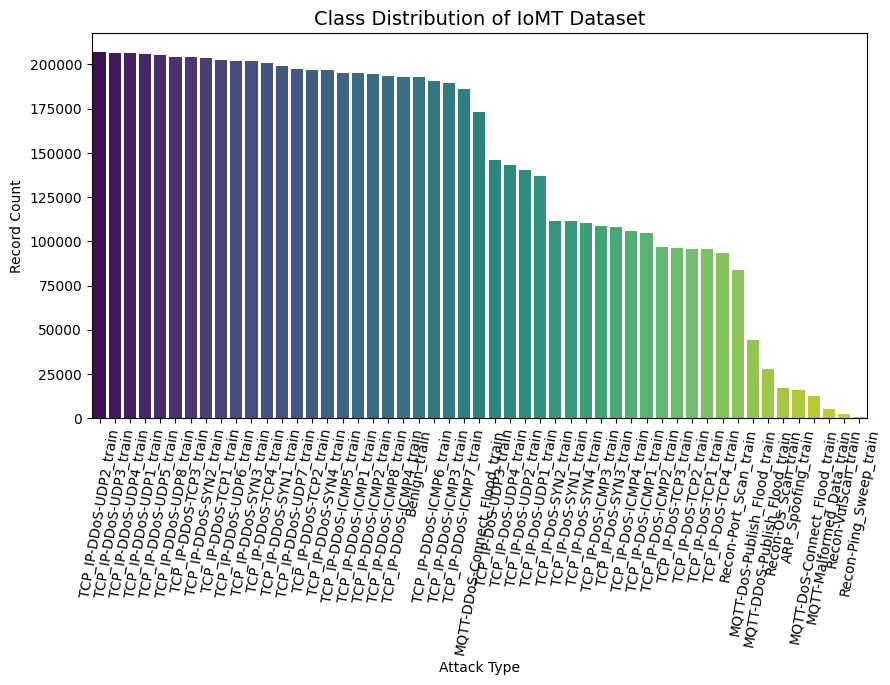

In [21]:
class_counts = df['label'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=80)
plt.title("Class Distribution of IoMT Dataset", fontsize=14)
plt.ylabel("Record Count")
plt.xlabel("Attack Type")
plt.show()

In [24]:
super_counts = df['SuperClass'].value_counts().sort_values(ascending=False)

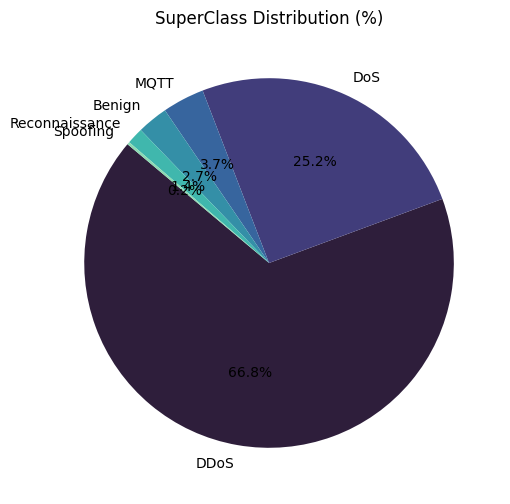

In [25]:
plt.figure(figsize=(6,6))
plt.pie(
    super_counts.values,
    labels=super_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("mako", n_colors=len(super_counts))
)
plt.title("SuperClass Distribution (%)")
plt.show()

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_42844\1751195381.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


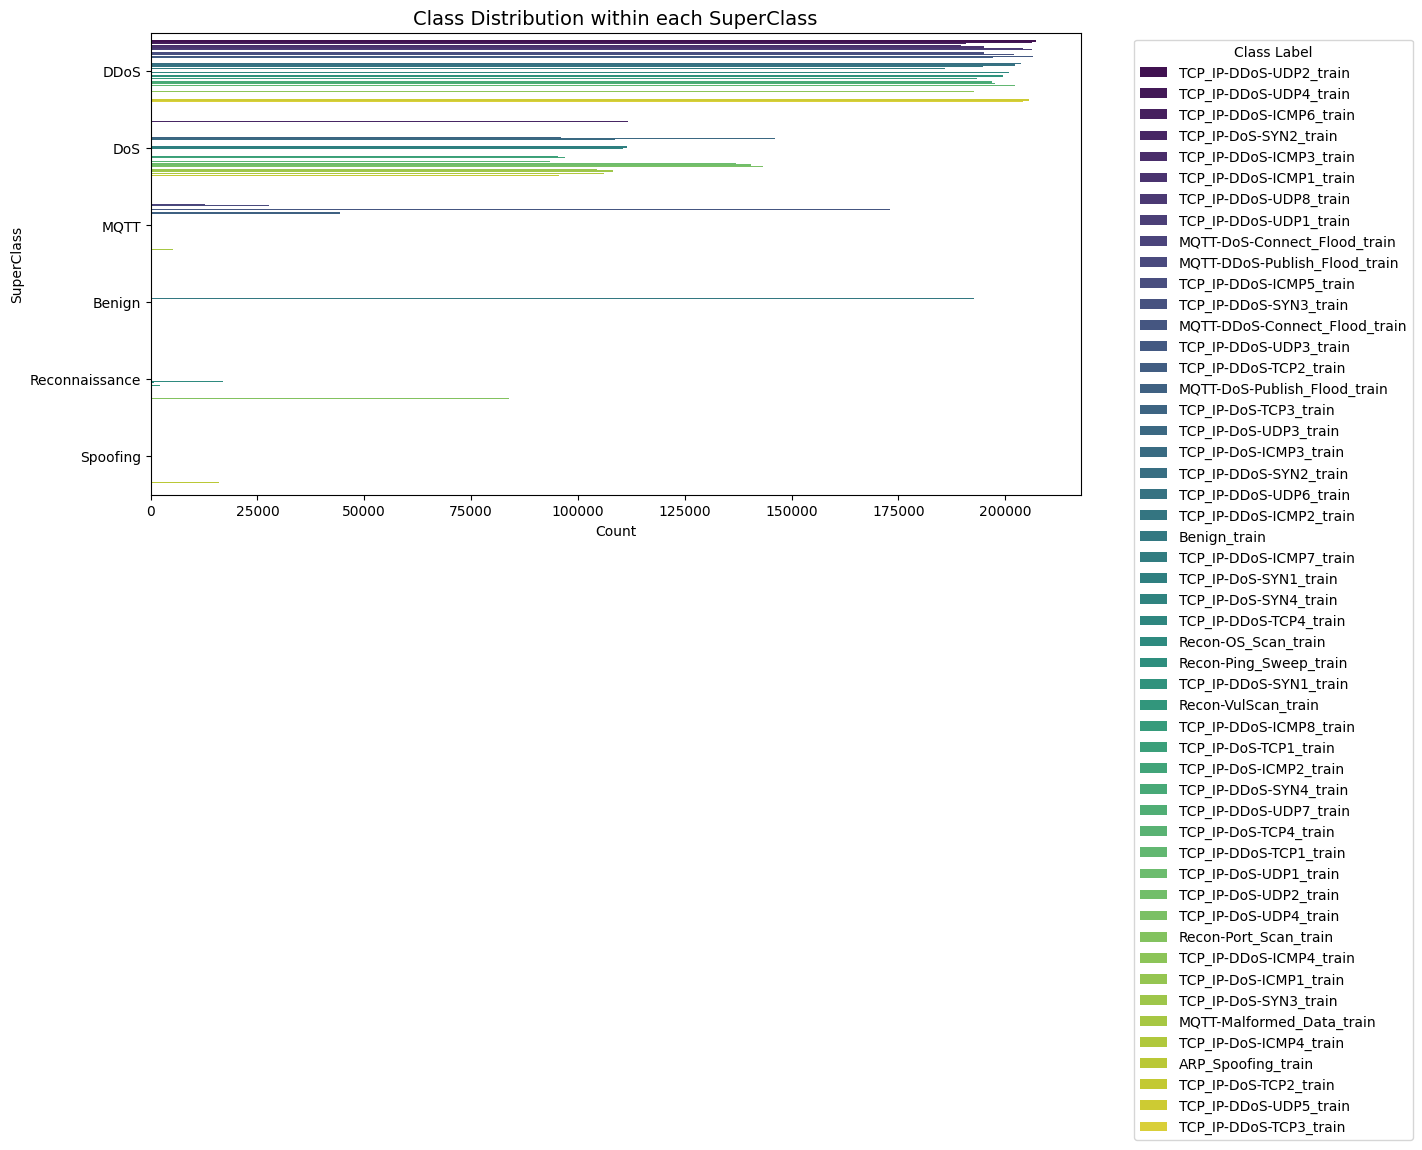

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='SuperClass', hue='label', palette="viridis", dodge=True)
plt.title("Class Distribution within each SuperClass", fontsize=14)
plt.xlabel("Count")
plt.ylabel("SuperClass")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Class Label")
plt.tight_layout()
plt.show()

In [26]:
super_counts = df['SuperClass'].value_counts().sort_values(ascending=False)
super_df = super_counts.reset_index()
super_df.columns = ['SuperClass', 'Count']

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_42844\2734892676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=super_df, x='SuperClass', y='Count', palette='rocket')


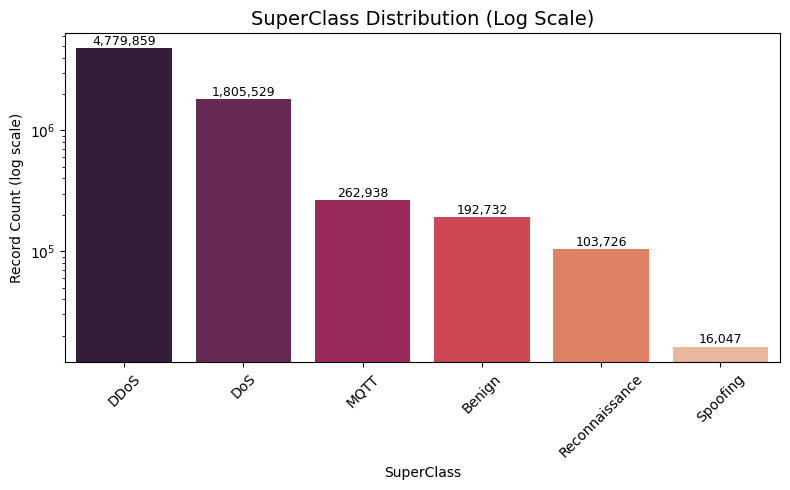

In [27]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=super_df, x='SuperClass', y='Count', palette='rocket')
ax.set_yscale('log')
plt.title("SuperClass Distribution (Log Scale)", fontsize=14)
plt.ylabel("Record Count (log scale)")
plt.xlabel("SuperClass")
plt.xticks(rotation=45)
for i, v in enumerate(super_df['Count']):
    ax.text(i, v + 500, f"{v:,}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

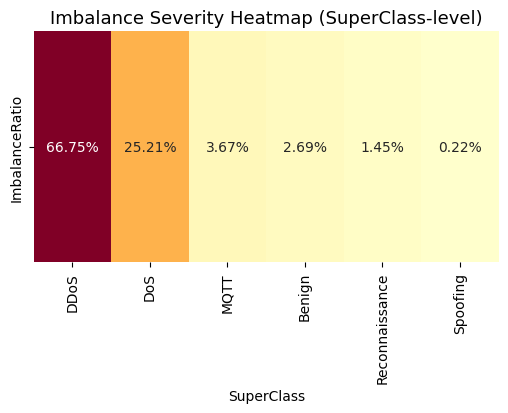

In [28]:
imbalance_ratio = super_df['Count'] / super_df['Count'].sum()
imbalance_df = pd.DataFrame({'SuperClass': super_df['SuperClass'], 'ImbalanceRatio': imbalance_ratio})
imbalance_df = imbalance_df.set_index('SuperClass')

plt.figure(figsize=(6,3))
sns.heatmap(imbalance_df.T, cmap='YlOrRd', annot=True, fmt=".2%", cbar=False)
plt.title("Imbalance Severity Heatmap (SuperClass-level)", fontsize=13)
plt.show()

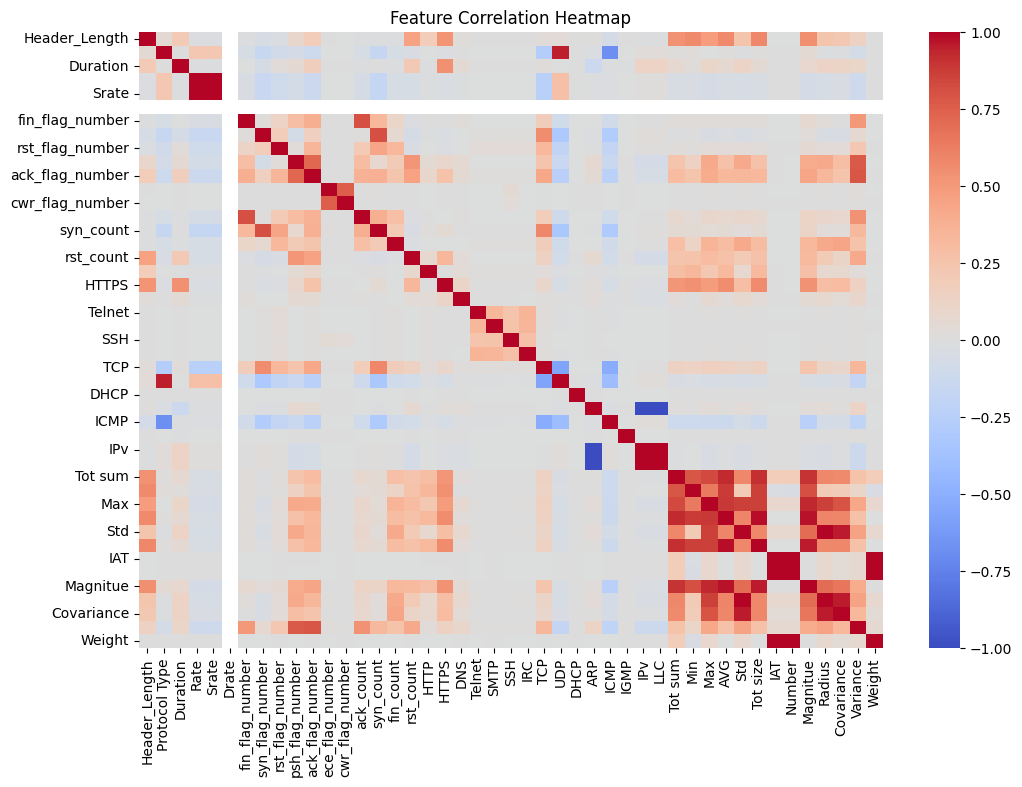

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Coping with class imbalance severity here..

Preprocessing pipeline:

In [32]:
ID_COLS = ['label', 'SuperClass']

In [33]:
DROP_COLS = ['Boot_Time_with_date', 'RTime', 'SrcAddr', 'DstAddr', 'SrcMac', 'DstMac', 'IMEI']

In [34]:
RATE_COLS = ['Rate', 'Srate', 'Drate'] 

In [35]:
TARGET_COUNTS = {
    'DDoS': 500_000,
    'DoS':  500_000,
    'Benign': 300_000,
    'MQTT': 300_000,
    'Reconnaissance': 200_000,
    'Spoofing': 200_000
}

In [36]:
cols_to_drop = [c for c in DROP_COLS if c in df.columns]
if cols_to_drop:
    print("Dropping ID/time columns:", cols_to_drop)
    df = df.drop(columns=cols_to_drop)

In [38]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,SuperClass
0,683.50,17.00,64.0,553148.440,553148.440,0,0.0,0.0,0.0,0.00,...,50.00,101635944.0,9.5,10.00,0.000,0.000000,0.00,141.5,TCP_IP-DDoS-UDP2_train,DDoS
1,1745.92,16.12,64.0,29919.545,29919.545,0,0.0,0.0,0.0,0.04,...,52.28,84696616.0,9.5,10.05,2.152,11.785338,0.23,141.5,TCP_IP-DDoS-UDP2_train,DDoS
2,2830.36,15.79,64.0,27075.605,27075.605,0,0.0,0.0,0.0,0.06,...,53.25,84696616.0,9.5,10.35,10.555,113.675460,0.53,141.5,TCP_IP-DDoS-UDP2_train,DDoS
3,4087.50,16.89,64.0,19660.156,19660.156,0,0.0,0.0,0.0,0.00,...,50.16,84696616.0,9.5,10.03,1.236,4.490081,0.18,141.5,TCP_IP-DDoS-UDP2_train,DDoS
4,3916.00,17.00,64.0,270322.780,270322.780,0,0.0,0.0,0.0,0.00,...,50.00,84696616.0,9.5,10.00,0.000,0.000000,0.00,141.5,TCP_IP-DDoS-UDP2_train,DDoS


In [40]:
df['SuperClass'].value_counts()

SuperClass
DDoS              4779859
DoS               1805529
MQTT               262938
Benign             192732
Reconnaissance     103726
Spoofing            16047
Name: count, dtype: int64

In [41]:
feature_cols = [c for c in df.columns if c not in ID_COLS]
print(f"Feature count: {len(feature_cols)}")

X_raw = df[feature_cols].copy()
y_raw = df['SuperClass'].copy()

Feature count: 45


In [42]:
non_numeric = [c for c in X_raw.columns if not np.issubdtype(X_raw[c].dtype, np.number)]
if non_numeric:
    print("Non-numeric columns detected - converting to numeric (if possible) or dropping:", non_numeric)
    for c in non_numeric:
        X_raw[c] = pd.to_numeric(X_raw[c], errors='coerce')
    non_numeric_after = [c for c in X_raw.columns if not np.issubdtype(X_raw[c].dtype, np.number)]
    if non_numeric_after:
        print("Dropping columns still non-numeric:", non_numeric_after)
        X_raw = X_raw.drop(columns=non_numeric_after)

In [47]:
rate_cols_present = [c for c in RATE_COLS if c in X_raw.columns]
if rate_cols_present:
    print("Applying MinMax normalization to rate cols:", rate_cols_present)
    mms = MinMaxScaler()
    X_raw[rate_cols_present] = mms.fit_transform(X_raw[rate_cols_present])

Applying MinMax normalization to rate cols: ['Rate', 'Srate', 'Drate']


In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
del X_raw
gc.collect()

25351

In [51]:
X_scaled.shape

(7160831, 45)

In [52]:
y_raw.value_counts()

SuperClass
DDoS              4779859
DoS               1805529
MQTT               262938
Benign             192732
Reconnaissance     103726
Spoofing            16047
Name: count, dtype: int64

In [53]:
cc_sampling = {}
for cls, cnt in y_raw.value_counts().items():
    if cls in TARGET_COUNTS and cnt > TARGET_COUNTS[cls]:
        cc_sampling[cls] = TARGET_COUNTS[cls]

In [54]:
cc_sampling

{'DDoS': 500000, 'DoS': 500000}

In [56]:
if cc_sampling:
    cc = ClusterCentroids(sampling_strategy=cc_sampling, random_state=20252008)
    print("Running ClusterCentroids undersampling")
    t0 = time.time()
    X_after_cc, y_after_cc = cc.fit_resample(X_scaled, y_raw)
    print("Undersample done in {:.1f}s. New shape:".format(time.time()-t0), X_after_cc.shape, y_after_cc.shape)
else:
    X_after_cc, y_after_cc = X_scaled, y_raw.values
    print("No undersampling performed; copying arrays.")

Running ClusterCentroids undersampling


KeyboardInterrupt: 

In [ ]:
del X_scaled
gc.collect()